# Focus: Compactness

In [1]:
import kagglehub
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import pearsonr
import scipy.stats as sts
from scipy.stats.contingency import association

%matplotlib inline
pd.set_option('display.max_columns', None)

data = pd.read_csv(r'cleaned_data.csv')
df = data.copy()


c:\ProgramData\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Specifying only compactness related columns

In [2]:
df_compactness = df[['id', 'diagnosis','compactness_mean', 'compactness_se', 'compactness_worst' ]]

### Defining a new value column

Idea: Add a new value for the difference between mean compactness and compactness at worst to explore possible correlation focusing the change of size

In [3]:
# defining a new measure for the difference between the mean and the worst compactness
df_compactness = df_compactness.assign( compactness_diff = lambda x: (x['compactness_worst'] - x['compactness_mean'] ))
df_compactness

,id,diagnosis,compactness_mean,compactness_se,compactness_worst,compactness_diff
0,842302,M,0.27760,0.04904,0.66560,0.38800
1,842517,M,0.07864,0.01308,0.18660,0.10796
2,84300903,M,0.15990,0.04006,0.42450,0.26460
3,84348301,M,0.28390,0.07458,0.86630,0.58240
4,84358402,M,0.13280,0.02461,0.20500,0.07220
...,...,...,...,...,...,...
564,926424,M,0.11590,0.02891,0.21130,0.09540
565,926682,M,0.10340,0.02423,0.19220,0.08880
566,926954,M,0.10230,0.03731,0.30940,0.20710
567,927241,M,0.27700,0.06158,0.86810,0.59110


In [4]:
# filtering the DataFrame by diagnosis
df_M = df_compactness[df_compactness['diagnosis'] == 'M']
df_B = df_compactness[df_compactness['diagnosis'] == 'B']

### Compactness histograms and overview

<>:24: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\3257177291.py:24: SyntaxWarning: invalid escape sequence '\h'
  plt.savefig('plots\histo_compactness.png')


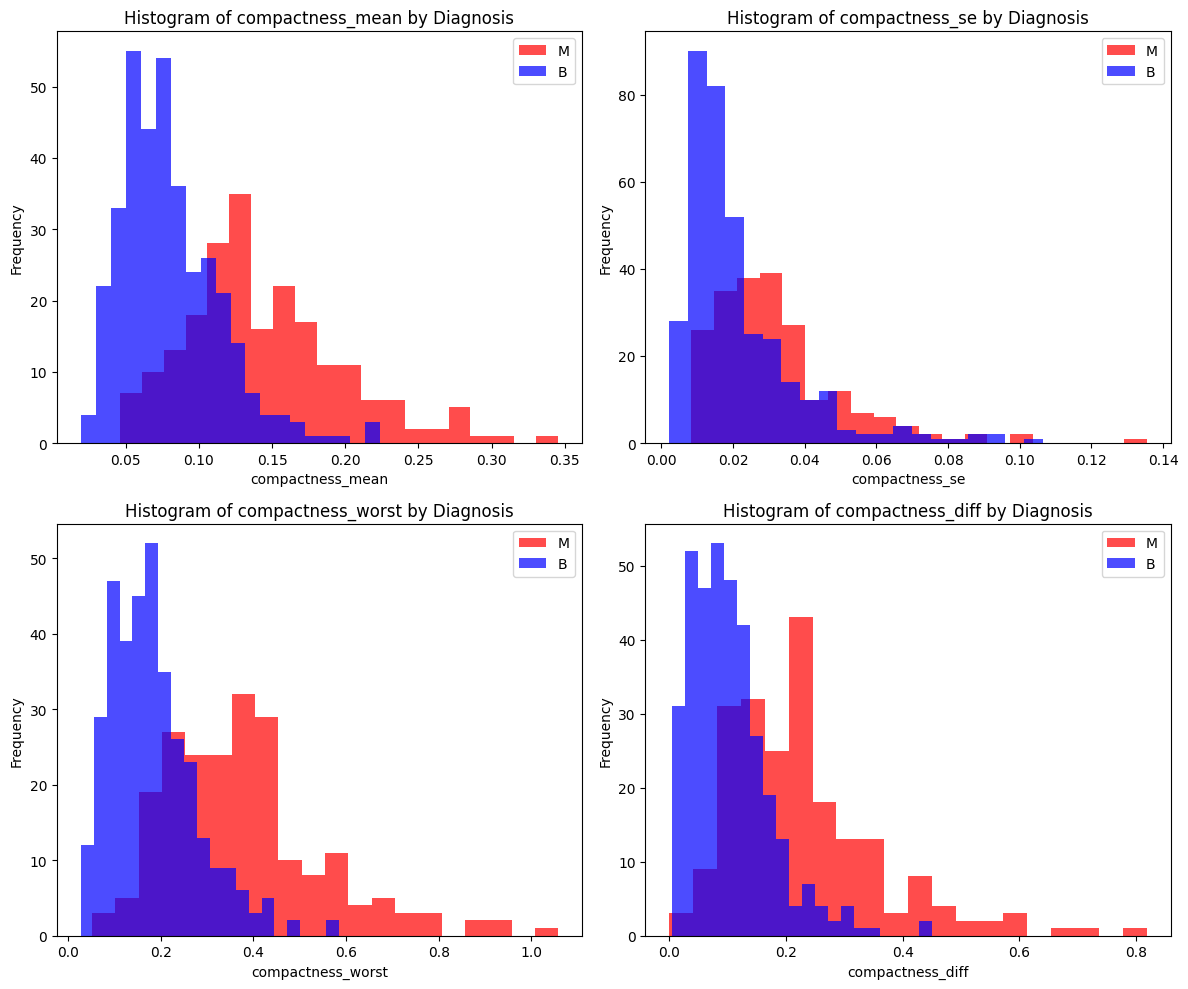

In [5]:
# list of compactness variables to compare
compactness_vars = ['compactness_mean', 'compactness_se', 'compactness_worst', 'compactness_diff']

# 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# loop through each compactness variable and plot overlapping histograms for "M" and "B"
for i, var in enumerate(compactness_vars):
    ax = axes[i // 2, i % 2]
    # filtering data by diagnosis
    data_M = df_compactness[df_compactness['diagnosis'] == 'M'][var]
    data_B = df_compactness[df_compactness['diagnosis'] == 'B'][var]
    

    ax.hist(data_M, bins=20, alpha=0.7, label='M', color='red')
    ax.hist(data_B, bins=20, alpha=0.7, label='B', color='blue')
    
    ax.set_title(f"Histogram of {var} by Diagnosis")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.savefig('plots\histo_compactness.png')
plt.show()




### Closer look at the overlapping regions

C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\2069352575.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_overlap.groupby(var + '_bin')['diagnosis'].count()
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\2069352575.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_cancer = df_overlap.groupby(var + '_bin')['diagnosis'].apply(lambda x: (x == 'M').sum() / len(x))
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\2069352575.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

compactness_mean_bin
(0.045, 0.0638]     0.093750
(0.0638, 0.0816]    0.115789
(0.0816, 0.0994]    0.217391
(0.0994, 0.117]     0.435897
(0.117, 0.135]      0.630769
(0.135, 0.153]      0.777778
(0.153, 0.171]      0.794118
(0.171, 0.188]      0.875000
(0.188, 0.206]      0.916667
(0.206, 0.224]      0.785714
Name: diagnosis, dtype: float64
compactness_se_bin
(0.00742, 0.0182]    0.200935
(0.0182, 0.028]      0.483871
(0.028, 0.0378]      0.566667
(0.0378, 0.0476]     0.545455
(0.0476, 0.0574]     0.681818
(0.0574, 0.0672]     0.571429
(0.0672, 0.077]      0.555556
(0.077, 0.0868]      0.600000
(0.0868, 0.0966]     0.000000
(0.0966, 0.106]      0.666667
Name: diagnosis, dtype: float64
compactness_worst_bin
(0.0503, 0.105]    0.041667
(0.105, 0.158]     0.103448
(0.158, 0.211]     0.200000
(0.211, 0.265]     0.316456
(0.265, 0.318]     0.509091
(0.318, 0.371]     0.609756
(0.371, 0.425]     0.851064
(0.425, 0.478]     0.842105
(0.478, 0.532]     0.818182
(0.532, 0.585]     0.833333
Name

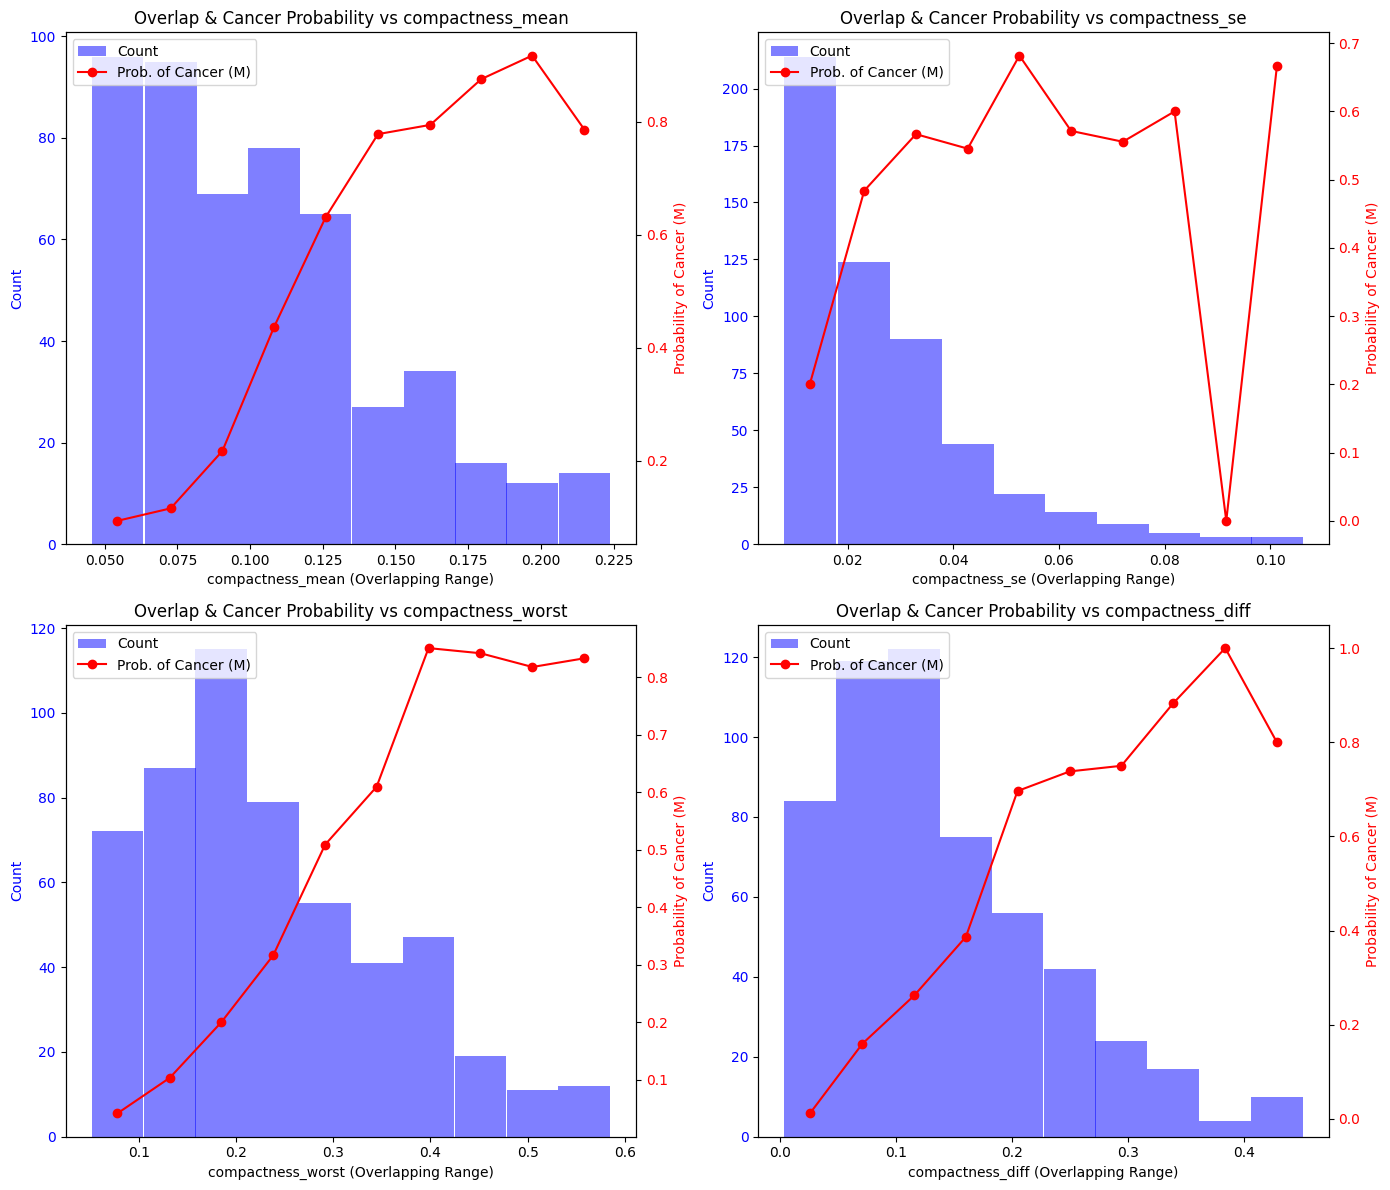

In [6]:
#  2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# loop over each compactness variable
for i, var in enumerate(compactness_vars):
    
    # determine the overlapping range for the variable
    min_overlap = max(df_M[var].min(), df_B[var].min())
    max_overlap = min(df_M[var].max(), df_B[var].max())
    
    # filter the DataFrame to the overlapping region
    df_overlap = df_compactness[(df_compactness[var] >= min_overlap) & (df_compactness[var] <= max_overlap)].copy()
    
    # create 10 evenly spaced bins in the overlapping range
    bins = np.linspace(min_overlap, max_overlap, 11)
    df_overlap[var + '_bin'] = pd.cut(df_overlap[var], bins=bins, include_lowest=True)
    
    # calculate counts for each bin and the probability of diagnosis "M"
    bin_counts = df_overlap.groupby(var + '_bin')['diagnosis'].count()
    prob_cancer = df_overlap.groupby(var + '_bin')['diagnosis'].apply(lambda x: (x == 'M').sum() / len(x))
    print(prob_cancer)

    # calculate bin centers and bin width
    bin_centers = [interval.mid for interval in bin_counts.index.categories]
    bin_width = bins[1] - bins[0]
    
    # plot on the current subplot
    ax = axes[i]
    # histogram (bar chart) for counts on primary y-axis (blue)
    ax.bar(bin_centers, bin_counts, width=bin_width, alpha=0.5, color='blue', label='Count')
    ax.set_xlabel(f"{var} (Overlapping Range)")
    ax.set_ylabel("Count", color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_title(f"Overlap & Cancer Probability vs {var}")
    
    # create a secondary y-axis for the probability curve (red)
    ax2 = ax.twinx()
    ax2.plot(bin_centers, prob_cancer.values, marker='o', linestyle='-', color='red', label='Prob. of Cancer (M)')
    ax2.set_ylabel("Probability of Cancer (M)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('plots/histo_overlap_compactness.png')
plt.show()





### Boxplot overview of 4 compactness' metrics

C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\3391487205.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_compactness,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\3391487205.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_compactness,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\3391487205.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=var, data=df_compactness,
C:\Users\Vanuhi\AppData\Local\Temp\ipykernel_30448\3391487205.py:8: FutureWa

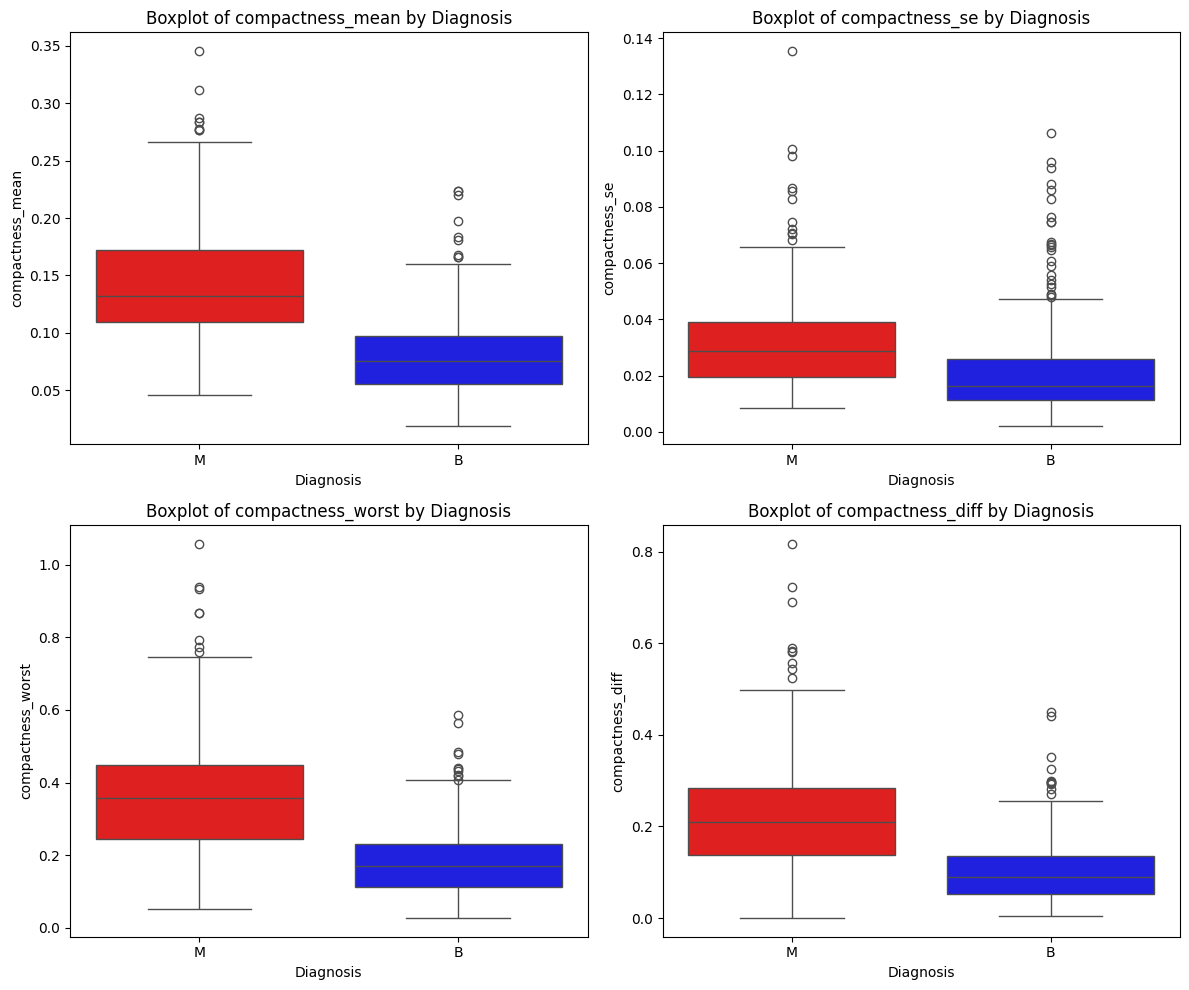

In [7]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # flatten the axes array so each element is an Axes instance

# Loop over each variable and generate a boxplot
for i, var in enumerate(compactness_vars):
    ax = axes[i]
    sns.boxplot(x='diagnosis', y=var, data=df_compactness,
                palette={'M': 'red', 'B': 'blue'}, ax=ax)
    ax.set_title(f"Boxplot of {var} by Diagnosis")
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel(var)

plt.tight_layout()
plt.savefig("plots/boxplt_compactness.png")
plt.show()




### Pearson's correlation for compactness_mean, compactness_se, compactness_worst and compactnesss_diff with diagnosis

In [8]:
df_compactness['diagnosis_numeric'] = df_compactness['diagnosis'].map({'B': 0, 'M': 1})

# list of compactness variables to analyze
compactness_columns = ['compactness_mean', 'compactness_se', 'compactness_worst', 'compactness_diff']

# dictionary for correlation results
results = {}

for col in compactness_columns:
    r, p = pearsonr(df_compactness['diagnosis_numeric'], df_compactness[col])
    results[col] = {'p-value': p, 'r-Pearson': r}

results_df = pd.DataFrame(results).T
print(results_df)


                        p-value  r-Pearson
compactness_mean   3.938263e-56   0.596534
compactness_se     9.975995e-13   0.292999
compactness_worst  7.069816e-55   0.590998
compactness_diff   1.223912e-43   0.536032


compactness mean and max(_worst) show the closest to 0 values, indicating strong correlation

### Chi-Square for the overlapping region for diagnosis and compactness mean

Let's pick the compactness metric with the smallest p-value and calculate its Chi-Square p-value.

Since the compactness is a continues numeric data, first converting it into discrete values within the overlapping region using binning technique and then calculating p-value of Chi-Square and Cramer V

In [9]:
# determining overlapping range
min_overlap = max(df_M['compactness_mean'].min(), df_B['compactness_mean'].min())
max_overlap = min(df_M['compactness_mean'].max(), df_B['compactness_mean'].max())

df_overlap = df_compactness[(df_compactness['compactness_mean'] >= min_overlap) & (df_compactness['compactness_mean'] <= max_overlap)]

# bins for the overlapping region (10 bins)
bins = np.linspace(min_overlap, max_overlap, 11)
df_overlap = df_overlap.copy()  # avoid SettingWithCopyWarning
df_overlap['compactness_bin'] = pd.cut(df_overlap['compactness_mean'], bins=bins, include_lowest=True)


contingency_table = pd.crosstab(df_overlap['compactness_bin'], df_overlap['diagnosis'])
print(contingency_table)


_,pvalue, _, _ = chi2_contingency(contingency_table)
cramer_v = association(contingency_table, method='cramer')
print(f'Chi-Square p-value is: {pvalue}\nCramer V is: {cramer_v}')


diagnosis          B   M
compactness_bin         
(0.045, 0.0638]   87   9
(0.0638, 0.0816]  84  11
(0.0816, 0.0994]  54  15
(0.0994, 0.117]   44  34
(0.117, 0.135]    24  41
(0.135, 0.153]     6  21
(0.153, 0.171]     7  27
(0.171, 0.188]     2  14
(0.188, 0.206]     1  11
(0.206, 0.224]     3  11
Chi-Square p-value is: 3.7694541006106594e-32
Cramer V is: 0.5813766795517757


this extremely small p-value allows us to reject the null hypothesis of independence with high confidence. It shows that there is a statistically significant association between the compactness bins and the diagnosis (B vs. M). This means that the distribution of benign ("B") and malignant ("M") cases across the compactness intervals is not due to random chance, and the metric compactness appears to have a strong relationship with the diagnosis outcome. 